# Exemple_Serie : Correction 
  ## Exercise 1: 

On considère une variable aléatoire réelle $X$ avec espérance $\mu$ et variance $\sigma^2 < \infty$. Soit $X_1, \dots, X_n$ un échantillon iid de $n$ variables aléatoires avec la même loi que $X$.
On définit $\overline{X}=  \frac{1}{n}\sum_i^n X_i $ et $\hat{\sigma}^2 = \frac{1}{n}\sum_i (X_i - \overline{X})^2$ des estimateurs empiriques des deux premiers moments de $X$.

1) a) Soit directement en markdown, soit à la main, calculer $\mathbb{E}[\overline{X}]$ et $\mathbb{E}[\hat{\sigma}^2]$:

**Solution**:  
Calcul de $\mathbb{E}[\overline{X}]$:  
\begin{align*}\mathbb{E}[\overline{X}] &= \mathbb{E}[\frac{1}{n}\sum_i^n X_i] \\
&= \frac{1}{n}\mathbb{E}[\sum_i^n X_i] \\
&= \frac{1}{n}\sum_i^n\mathbb{E}[ X_i] \\
&= \frac{1}{n}\sum_i^n \mu = \mu 
\end{align*}  

Calcul de $\mathbb{E}[\hat{\sigma}^2]$:
\begin{align*}
\mathbb{E}[\hat{\sigma}^2] &= \mathbb{E}[\frac{1}{n}\sum_i (X_i - \overline{X})^2] \\
&= \frac{1}{n}\mathbb{E}[\sum_i (X_i - \overline{X})^2] \\
&= \frac{1}{n}\mathbb{E}[\sum_i (X_i^2 - 2*X_i*\overline{X} + \overline{X}^2)] \\
&= \frac{1}{n}\left( \mathbb{E}[\sum_i X_i^2] - 2 \overline{X}\mathbb{E}[\sum_i X_i] + \mathbb{E}[\sum_i \overline{X}^2]\right) \\
&= \frac{1}{n}\left( \sum_i\mathbb{E}[ X_i^2] - 2\sum_i\mathbb{E}[ \overline{X} X_i] + \sum_i\mathbb{E}[\overline{X}^2]\right) \\
&= \mathbb{E}[X_i^2] - 2 \mathbb{E}[\overline{X}^2] + \mathbb{E}[\overline{X}^2]
\end{align*}
Ce qui nous donne:
\begin{equation*}
\mathbb{E}[\hat{\sigma}^2] = \mathbb{E}[X_i^2] -  \mathbb{E}[\overline{X}^2] =  (\sigma^2 + \mu^2) - (\mu^2 + \frac{\sigma^2}{n}) = \frac{n-1}{n}\sigma^2
\end{equation*}

b) En déduire un estimateur non-biaisé de $\sigma^2$.

**Solution**:  
Comme l'espérence est linéaire, on a que l'estimateur $\hat{\sigma}^2_{non-biaisé} = \frac{n}{n-1} \hat{\sigma}^2$ est non-biaisé. Effectivement, on a:
\begin{equation*}
\mathbb{E}[\hat{\sigma}^2_{non-biaisé}] = \frac{n}{n-1} \mathbb{E}[\hat{\sigma}^2] = \sigma^2 \end{equation*} 

2) Proposer une méthode pour estimer l'espérance et la variance si nous avions un échantillon $X_1, \dots, X_n$ de grande taille.

**Solution**:  
Comme nous venons de le montrer dans les questions précédentes, l'estimateur $\overline{X}$ est non-biaisé pour le paramètre $\mu$, donc une façon naturelle d'estimer $\mu$ si nous avons à disposition un grand nombre d'observation est de poser $\hat{\mu} = \overline{X}$. De la même façon, nous avons deux estimateur du paramètre $\sigma^2$:
- $\hat{\sigma}^2$
- $\hat{\sigma}^2_{non-biaisé}$  

L'estimateur $\hat{\sigma}^2_{non-biaisé}$ étant non-biaisé, nous préfèrerons celui-ci, dans le cadre de cet exercice, pour estimer $\sigma^2$. Avec un grand nombre d'observation à notre disposotion, nous estimerons donc $\sigma^2$ par $\hat{\sigma}^2_{non-biaisé} = \frac{1}{n-1}\sum_i (X_i - \overline{X})^2$. Cependant, nous verrons plus tard qu'il n'est pas toujours préférable de choisir un estimateur non-biaisé. En effet, il sera des fois mieux de choisir un estimateur avec un peu de biais mais une variance moindre, ce compromis entre le biais et la variance sera étudié à travers l'erreur quadratique moyenne (EQM).  

3) Nous allons maintenant tester cela en générant un grand nombre de variables aléatoires pour une variable étudiée en cours (une variable suivant la loi Beta par exemple):  
a) Générer $n = 10000$ observations de la loi que vous avez choisi.

In [ ]:
########### Solution R: ##########

n <- 10000
a <- 5.5
b <- 3.14

X <- rbeta(n,a,b)

a) Calculer la moyenne et la variance de la loi que vous avez choisi pour les paramètres que vous avez fixé.

**Solution**:  
On rappelle une variable aléatoire $X\sim\text{Beta}(a,b)$, on a $\mathbb{E}[X] = \frac{a}{a +b}$ et $\text{Var}[X] = \frac{a - 1}{a + b -2}$.


In [ ]:
mean <- a/(a+b)
var <- a*b/((a+b)^2*(a+b+1))

1) Faire un plot de l'évolution de l'estimation de la moyenne en fonction du nombre $m = 1, \cdots, n$ d'obervations utilisé dans l'estimation. Faire aussi apparaître la vrai valeur de la moyenne sur ce plot.

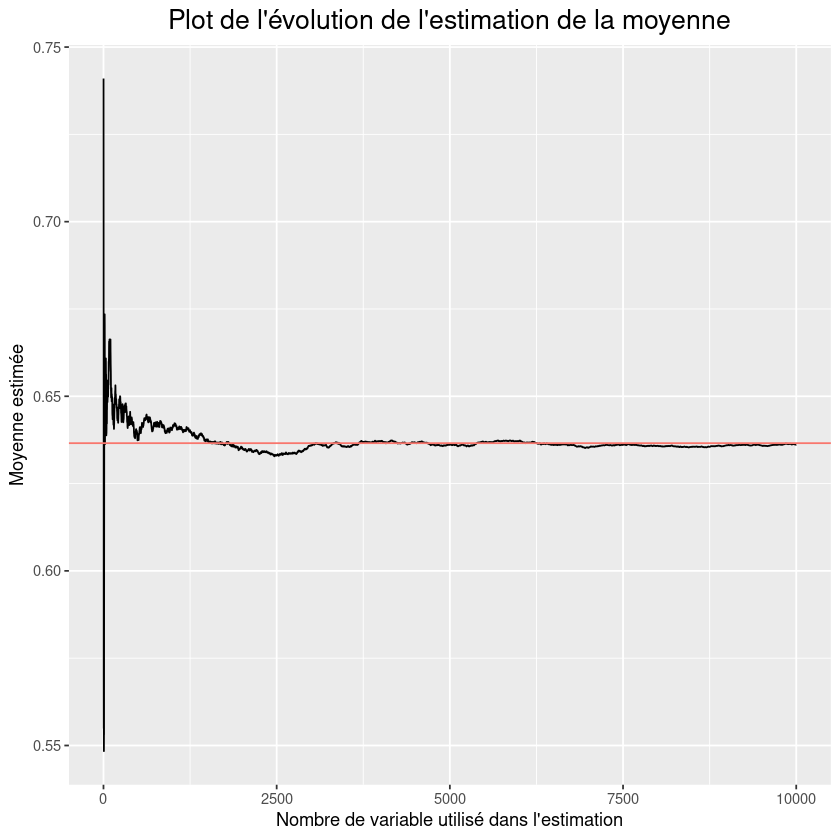

In [ ]:
library(ggplot2)
df <- data.frame(X = X)

# Plot de l'évolution de l'estimation de la moyenne
df$cumulative_prop <- cumsum(df$X)/(1:n)
df$iter <- 1:n

fig <-ggplot(df,aes(x=iter,y=cumulative_prop)) + geom_line() + geom_hline(aes(yintercept = mean, colour = "r")) +
    labs(title="Plot de l'évolution de l'estimation de la moyenne", 
         x = "Nombre de variable utilisé dans l'estimation",y="Moyenne estimée") +
    theme(plot.title = element_text(hjust = 0.5, size = 16),legend.position = "none")
fig

2) Faire un plot de l'évolution de l'estimation de la variance en fonction du nombre $m = 1, \cdots, n$ d'obervations utilisé dans l'estimation. Faire aussi apparaître la vrai valeur de la variance sur ce plot.

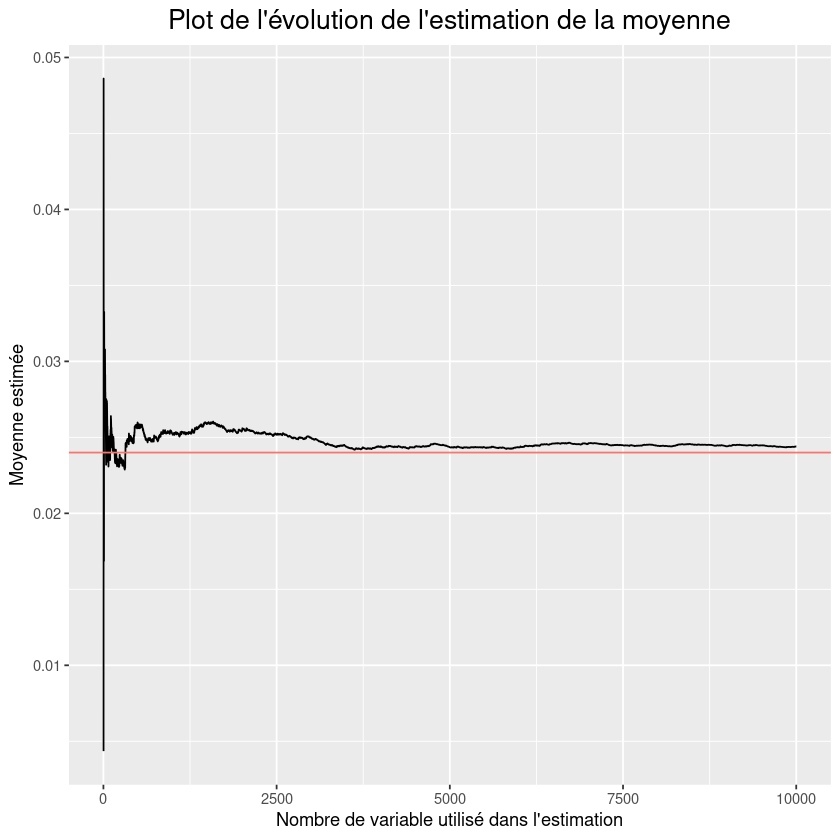

In [ ]:
# Calculer l'estimation de la variance pour chacunes des m premières observations
df_ <- data.frame(var_hat = rep(0.,n-1),iter = 2:n)
for (i in 1:n-1){
    df_$var_hat[i] <- var(X[1:(i+1)])
}


# Plot de l'évolution de l'estimation de la moyenne
fig <-ggplot(df_,aes(x=iter,y=var_hat)) + geom_line() + geom_hline(aes(yintercept = var, colour = "r")) +
    labs(title="Plot de l'évolution de l'estimation de la moyenne", 
         x = "Nombre de variable utilisé dans l'estimation",y="Moyenne estimée") +
    theme(plot.title = element_text(hjust = 0.5, size = 16),legend.position = "none")
fig

## Exercise 2: Estimation de Monte-Carlo

Considérer un domaine quelconque (mesurable, de mesure non-nulle) $D\subset [0,1]^2\subset \mathbb{R}^2$. Soit $X\sim f_X$ un variable aléatoire de densité $f_X$ telle que $D\subset \text{supp}(f_X)$ (le support de $f_X$, c'est-à-dire l'ensemble pour lequel $f_X >0$) et soit $Y = \mathbf{1}_{\{X\in D\}}$. 

1) Donner la distribution de $Y$ en fonction de $X$.

**Solution**:  
\begin{equation*}
Y = \left\{ \begin{array}{ll}
1 & \text{ si $X\in D$} \\
0 & \text{ sinon}.
\end{array} \right. = 
\left\{ \begin{array}{ll}
1 & \text{ avec probabilité }\Pr(X\in D) \\
0 & \text{ avec probabilité } 1 - \Pr(X\in D).
\end{array} \right.
\end{equation*}

2) Calculer l'espérance de $Y$. 

**Solution**: On a:
\begin{equation*}
\mathbb{E}[Y]= \mathbb{E}\left[\mathbf{1}_{\{X\in D\}}\right] = \mathbb{P}\left( X\in D\right) 
\end{equation*}


3) Supposons à présent que $X \sim \mathcal{U}\left([-1,1]^2\right)$ et considérons le disque $D = \{(x,y) \in \mathbb{R}^2: x^2 +y^2 \leq 1\}$.  
a) Calculer $\mathbb{P}(X\in D)$.

**Solution**: On a:
\begin{equation*}
\mathbb{P}(X\in D) = \iint_{D} f_X(x,y) dx dy = \iint_{D} \frac{1}{4} dx dy = \frac{\pi}{4}
\end{equation*}


b) En supposant qu'on dispose d'un grand échantillon $X_1, \cdots, X_n \stackrel{idd}{\sim} \mathcal{U}\left([-1,1]^2\right)$ proposer une procédure pour estimer la valeure de $\pi$.

**Solution**: On a vu précédement qu'en définissant la variable aléatoire $Y = \mathbf{1}_{\{X\in D\}}$, on a que $\mathbb{E}[Y] = \mathbb{P}\left( X\in D\right) = \frac{\pi}{4}$. Avec un $n$ observations de la variable aléatoire $X$, on peut donc avoir $n$ observations de la variable aléatoire $Y$ et donc estimer $\mathbb{E}[Y]$ avec plus ou moins de précision en fonction de $n$. On aura alors $\pi \approx 4\overline{Y}$.

c) En déduire une estimation de $\pi$ et montrer la convergence de l'estimation sur un plot.

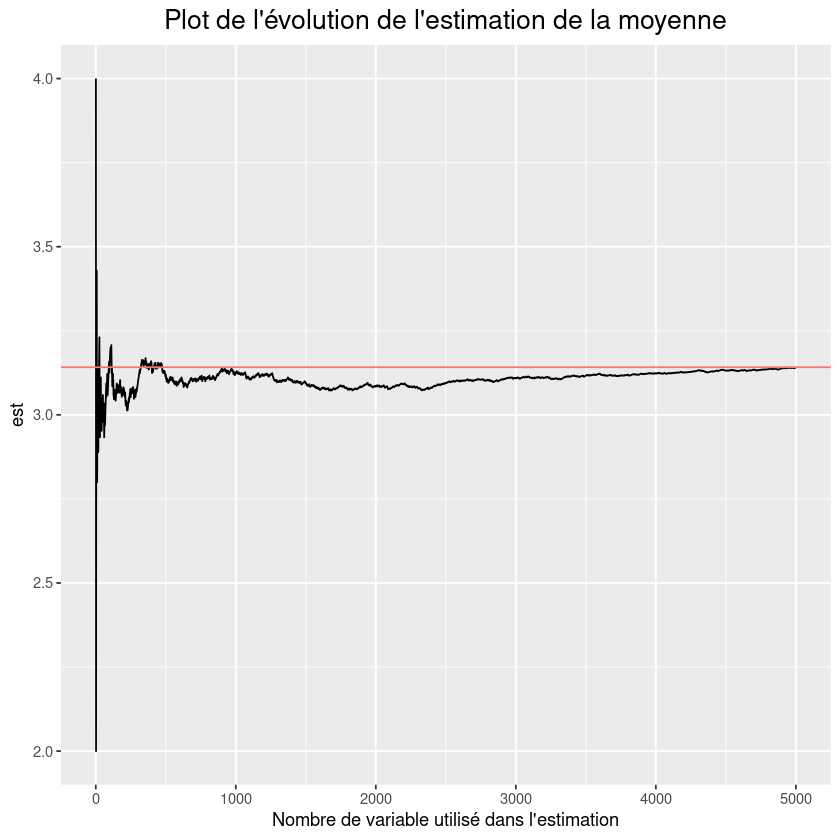

In [ ]:
library(ggplot2)

n <- 5000

# Générer un échantillon de n VA unif([-1,1])

X <- matrix(runif(2*n,min=-1,max=1),ncol=2)

# Générer la variable aléatoire Y
Y <- (apply(X,1,FUN=norm,type="2")<=1)

# Évolution de l'estimation de pi
fig <- ggplot(data.frame(iter=1:n,est = 4*cumsum(Y)/(1:n) ),aes(x=iter,y=est)) + geom_line() + geom_hline(aes(yintercept = pi, colour = "r")) +
    labs(title="Plot de l'évolution de l'estimation de la moyenne", 
         x = "Nombre de variable utilisé dans l'estimation") +
    theme(plot.title = element_text(hjust = 0.5, size = 16),legend.position = "none")
fig

4) Soit une fonction $h\in C^0([0,1]^2)$. À l'aide d'un échantillon de variables $X \sim \mathcal{U}\left([0,1]^2\right)$, en vous inspirant des questions précédentes, donner une estimation de 
\begin{equation*}
\int_{[0,1]^2} h(x) \ dx.
\end{equation*}
De plus, on rappel la propriété suivante de l'espérance: 
\begin{equation*}
\mathbb{E}[h(X)] = \int_{[0,1]^2} h(x,y) f_X(x,y)\ dxdy
\end{equation*}

**Solution**: En utilisant la propriété de l'espérance ci-dessus et en l'associant avec le fait que $f_X(x,y) = 1,\  \forall x,y \in[0,1]$, on obtient que: 
\begin{equation*}
\int_{[0,1]^2} h(x) \ dx = \mathbb{E}[h(X)]
\end{equation*}
Une façon naturelle d'estimer $\int_{[0,1]^2} h(x) \ dx$ est donc de calculer de transformer l'échantillon $X_1, \cdots, X_n \sim \mathcal{U}\left([0,1]^2\right)$  que nous avons en un échantillon $h(X_1,) \cdots, h(X_n)$, puis d'estimer l'espérance de la variable $h(X)$ par l'estimateur non-biaisé $\overline{h(X)} = \frac{1}{n} \sum_{i=1}^{n}h(X_i)$.

5) En considérant la fonction $h(x,y) = e^{x^2+y^2}\in C^0([0,1]^2)$, calculer une approximation de $\int_{[0,1]^2} h(x) \ dx$ et comparé cette valeur à sa vrai valeur qui vaut $\int_{[0,1]^2} h(x) \ dx \approx 2.139350129$.

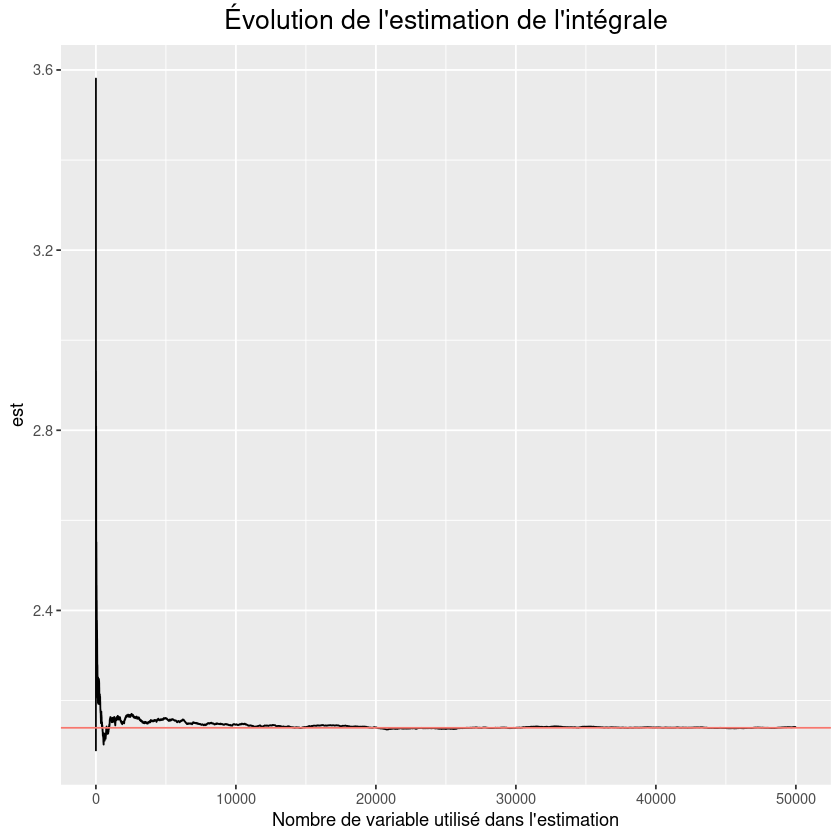

In [ ]:
n <- 50000
true_value <- 2.139350129

# Générer un échantillon de n VA unif([-1,1])

X <- matrix(runif(2*n),ncol=2)

# Écrire la fonction h
h <- function(X){
    
    val <- exp(apply(X,1,FUN=norm,type="2")^2)
    val
}
# Générer la variable aléatoire Y
Y <- h(X)

# Plot de l'évolution de l'estimation de la moyenne
fig <- ggplot(data.frame(iter=1:n,est = cumsum(Y)/(1:n) ),aes(x=iter,y=est)) + geom_line() + geom_hline(aes(yintercept = true_value, colour = "r")) +
    labs(title="Évolution de l'estimation de l'intégrale", 
         x = "Nombre de variable utilisé dans l'estimation") +
    theme(plot.title = element_text(hjust = 0.5, size = 16),legend.position = "none")
fig

6) Soient $X_1, \cdots, X_n$ une suite variable aléatoire réelles indépendantes et identiquement distribuées de moyennes et de variances communes $\mu$ et $\sigma^2$ finies. On peut reformuler le théorème central limite de la façon suivante:
\begin{equation*}
\overline{X}_n - \mu \sim \frac{1}{\sqrt{n}}\mathcal{N}(0,\sigma^2),\ \text{pour $n$ assez grand}
\end{equation*}
On a donc que le taux de convergence de la $\text{RMSE} = \sqrt{\mathbb{E}\left[(\overline{X}_n-\mu)^2\right]}$ est de $\sqrt{n} = n^{-\frac{1}{2}}$. En reprenant l'estimation de $\pi$, illustrer le taux de convergence de la RMSE en estimant la racine carrée de l'erreur quadratique moyenne pour plusieurs valeurs de $n$ (par exemple $n\in\{10,20,50,100,200,500,1000\}$) et en générant à chaque fois $m = 100$ échantilons, puis en faire un plot en échelle logarithmique sur l'axe des ordonée. La doite de régression devrait avoir une pente de $-\frac{1}{2}$ car le taux de convergence est de $\sqrt{n}$.

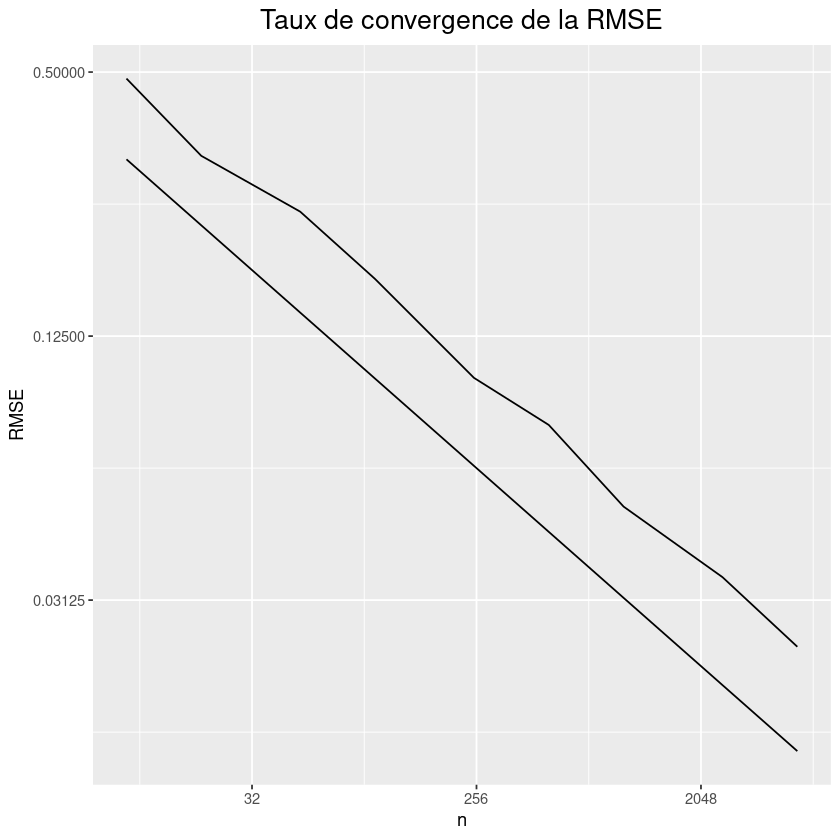

In [ ]:
N <- c(10,20,50,100,250,500,1000,2500,5000)
m <- 100

RMSE <- rep(0.,length(N))

i <- 0
for (n in N){
    i <- i+1
    échantillon_estimation = rep(0.,m)
    for (j in 1:m){
        # Générer un échantillon de n VA unif([-1,1])
        
        X <- matrix(runif(2*n,min=-1,max=1),ncol=2)
        # Estimation de pi
        
        pi_est = 4*mean(apply(X,1,FUN=norm,type="2")<=1)
        # Calcul de la MSE de l'échantillon
        
        échantillon_estimation[j] <- (pi_est-pi)^2
    }
    RMSE[i] = sqrt(mean(échantillon_estimation))
}
# Plot du taux de convergence
fig <- ggplot(data.frame(iter=N,RMSE = RMSE,taux_theorique = 1/sqrt(N)),aes(x=iter)) + geom_line(aes(y=RMSE)) + geom_line(aes(y=taux_theorique))+
        scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2') +
        labs(title="Taux de convergence de la RMSE", 
         x = "n") +
        theme(plot.title = element_text(hjust = 0.5, size = 16),legend.position = "none")
fig

Les applications des méthodes de Monte-Carlo sont nombreuses, cependant elles sont particulièrement utilisées pour calculer des intégrales en dimensions plus grandes que 1 (en particulier, pour calculer des surfaces et des volumes). Elles sont également couramment utilisées en physique des particules, où des simulations probabilistes permettent d'estimer la forme d'un signal ou la sensibilité d'un détecteur. La comparaison des données mesurées à ces simulations peut permettre de mettre en évidence des caractéristiques inattendues, par exemple de nouvelles particules.